In [7]:
import pandas as pd
import glob
# servers = ["1xCPU", "1xT4", "2xT4", "4xT4", "10xT4"]
# meas_dir = "/depot/cms/sonic/dkondra/saturation_measurements_nov2023/"
# n_jobs = [1,2,4,8,12,16,20,24,32,40,48,56,64]

servers = ["1xCPU_mem", "1xT4_mem"]
meas_dir = "/depot/cms/sonic/dkondra/saturation_measurements/"
# n_jobs = [1,5,10,15,20,25,30,40,60,80,100,150,200]
# n_jobs = [1,5,10,15,25,40,60,80,100,150,200]
# n_jobs = [1,2,5,10,15,20,25,30,40,50,60,80,100,150,200]
# n_jobs = [1,2,5,10,15,20,25,30,40,50,60,80,100,150,160]


columns = ["RAM", "run"]+servers 
df = pd.DataFrame(columns=columns)
# df.loc[0, :] = [0 for c in columns]
i = 0
for server in servers:
    for filename in glob.glob(f"{meas_dir}/{server}/*.txt"):
        try:
            ram, run = filename.split("/")[-1].split("G_run")
            ram = int(ram)
            run = int(run.strip(".txt"))
            #print(ram, run)
            with open(filename, 'r') as file:
                values_list = [float(value.strip()) for value in file.readlines()]
                df.loc[i, server] = sum(values_list)
                df.loc[i, "RAM"] = ram
                df.loc[i, "run"] = run
                # df.loc[i, "perfect"] = df.loc[1, server] * i
                #print(i, values_list)
                i += 1

        except Exception:
            print(f"Skip {filename}")
# df.loc[200, "1xCPU"] = 2*df.loc[100, "1xCPU"]
df.sort_index(inplace=True)
print(df)

Skip /depot/cms/sonic/dkondra/saturation_measurements//1xCPU_mem/8G.txt
Skip /depot/cms/sonic/dkondra/saturation_measurements//1xCPU_mem/1G.txt
Skip /depot/cms/sonic/dkondra/saturation_measurements//1xCPU_mem/4G.txt
Skip /depot/cms/sonic/dkondra/saturation_measurements//1xCPU_mem/16G.txt
Skip /depot/cms/sonic/dkondra/saturation_measurements//1xCPU_mem/2G.txt
   RAM run 1xCPU_mem  1xT4_mem
0    6   0  1.413575       NaN
1    2   2  1.350077       NaN
2   10   1  1.868796       NaN
3    1   3  1.309496       NaN
4    8   3  1.870404       NaN
..  ..  ..       ...       ...
88   4   0       NaN  2.190946
89  10   4       NaN   2.38603
90   8   2       NaN  2.406239
91  10   0       NaN  2.381023
92  12   2       NaN  2.405755

[93 rows x 4 columns]


          run  1xCPU_mem  1xT4_mem
RAM                               
1    2.583333   1.324292  1.852016
2    2.000000   1.338135  1.866989
4    1.777778   1.402801  2.171407
6    2.000000   1.392514  2.169244
7    2.000000   1.869780  2.313099
8    2.000000   1.860420  2.397213
10   1.777778   1.864080  2.396357
12   1.625000   1.864629  2.394999
16   2.000000   1.867020  2.401907
20   2.000000        NaN  2.397064


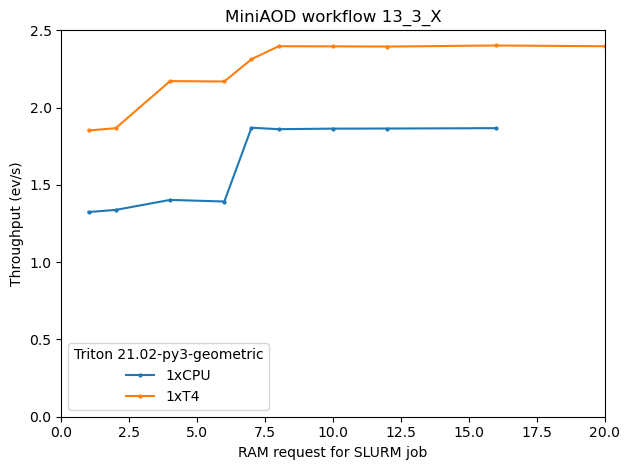

In [8]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = iter(colors)
color_dict = {}
fig, ax1 = plt.subplots()

opts1 = {
    "marker": "o",
    "ms": 2,
}
opts2 = {
    "marker": "",
    "ms": 2,
    "linestyle": "--"
}
df_ = df.groupby("RAM").mean()
print(df_)
for server in servers:
    label = server.strip("_mem")
    color = next(color_cycle)
    color_dict[server] = color
    ax1.plot(df_.index, df_[server], label=label, color=color, **opts1)

ax1.set_title("MiniAOD workflow 13_3_X")
ax1.set_xlabel('RAM request for SLURM job')
ax1.set_ylabel('Throughput (ev/s)')
ax1.set_xlim(0, max(df_.index))
# plt.ylim(0, df.max().max()*1.05)
ax1.set_ylim(0, 2.5)
# plt.xscale('log')
ax1.legend(title="Triton 21.02-py3-geometric")
ax1.tick_params(axis='x', which='both', labelbottom=True)


plt.tight_layout()
# plt.show()

from datetime import datetime
save_path = "/depot/cms/sonic/dkondra/sonic-studies/plots/"
datestamp = datetime.now().strftime("%d%b%Y")
filename = f"saturation_scan_{datestamp}.pdf"
plt.savefig(save_path+filename)